## Preparation des donnees et features ingeneering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib
import sys
sys.path.append('/app/notebooks/hdfs')
from utils import *

In [2]:
## Charger données prétraitées
df = load_data()
event_cols = get_event_columns(df)

print(f"Shape: {df.shape}")
print(df.head())
print(f"Labels: {df['Label'].value_counts()}")

Shape: (575061, 32)
                    BlockId    Label  Type  E1  E2   E3  E4  E5  E6  E7  ...  \
0  blk_-1608999687919862906  Success   NaN   0   0  203   0  10   7   0  ...   
1   blk_7503483334202473044  Success   NaN   0   2    1   0   3   0   0  ...   
2  blk_-3544583377289625738     Fail  21.0   0   0  203   0   3   0   0  ...   
3  blk_-9073992586687739851  Success   NaN   0   3    0   0   3   0   0  ...   
4   blk_7854771516489510256  Success   NaN   0   3    1  15   3   0   0  ...   

   E20  E21  E22  E23  E24  E25  E26  E27  E28  E29  
0    0   10    1   10    0    4   10    0    0    0  
1    0    3    1    3    0    0    3    0    0    0  
2    1    3    1    3    0    0    3    0    0    0  
3    0    3    1    3    0    0    3    0    0    0  
4    0    3    1    3    0    0    3    0    0    0  

[5 rows x 32 columns]
Labels: Label
Success    558223
Fail        16838
Name: count, dtype: int64


In [3]:
## Preparation des variables X et y

#Features : toutes les colonnes qui commencent par 'E' suivi de chiffres
X = df.filter(regex='^E\d+$').fillna(0)

#Target : 1 si 'Fail', 0 sinon
y = (df['Label'] == 'Fail').astype(int)

print(f"X: {X.shape}")
print(f"y: Success={sum(y==0)}, Fail={sum(y==1)}")

X: (575061, 29)
y: Success=558223, Fail=16838


In [4]:
# Suppression des features a faibles variance qui n'apportent pas d'information
event_variance = X.var().sort_values(ascending=True)
low_variance_events = event_variance[event_variance < 0.01].index
X = X.drop(columns=low_variance_events)
print(f"Features restantes: {X.shape[1]}")

Features restantes: 14


Features apres suppression correlations elevees: 9


<Axes: >

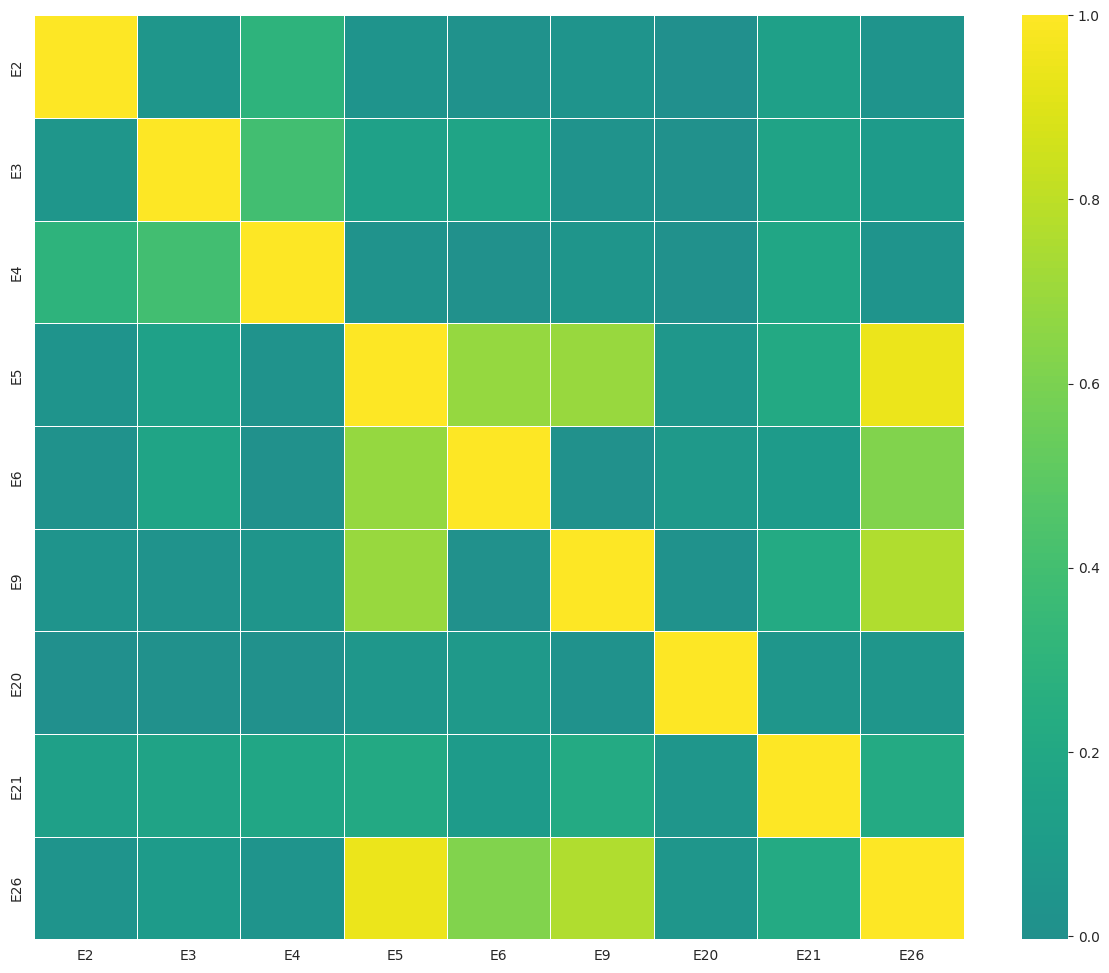

In [5]:
# Suppression correlations elevees
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.95)]

X = X.drop(columns=to_drop_corr)
print(f"Features apres suppression correlations elevees: {X.shape[1]}")

# Visualisation
plt.figure(figsize=(15, 12))
sns.heatmap(
    X.corr(), 
    annot=False, 
    cmap='viridis',
    linewidths=.5,
    center=0
)

### Sauvagardes des donnees
On met toutes les donnees sur une meme echelle afin d'ameliorer la performance du modele. (E5: 1723232 vers E24: 4)
- X_scaled : Features normalisees
- y : Labels (0=Success, 1=Fail)
- scaler : Pour transformer de nouvelles données


In [6]:
joblib.dump(X, PROCESSED_DIR / 'X_preprocessed.pkl')
joblib.dump(y, PROCESSED_DIR / 'y_preprocessed.pkl')

print("Donnees pretraitees sauvegardees.")
print(f" {X.shape[0]} echantillons")
print(f" {X.shape[1]} features")

Donnees pretraitees sauvegardees.
 575061 echantillons
 9 features
